# Data Challenge 2 Employee Retention

### One of the main drivers of employee retention past the one year mark is salary. 
Employees with the highest and lowest salaries have a lower rate of churn while those in the middle have a higher rate of churn. 

### Potential Reasons
Individuals with a moderate salary are able to get more money from another job opportunity. Those with high salaries may be content with the money they are making, while those with lower salaries may not be able to get more money from another job offer. 

### Follow up Actions
To target the employees making a moderate amount of money, since they are more likely to leave after a year, the company could offer an automatic salery increase after 36 months on the job. 

### Data Request
It would be great to have salary information for each year the employee was at the company rather than the average salary. My proposed solution depends on the rate of salary increase being meaningful the the employee. If we could identify the rate of salary increase it may be a potential predictor for churn. 


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from datetime import datetime, timedelta
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp


In [3]:
ER = pd.read_csv('/Users/josephineferrandino/Desktop/data_challenges/20A/data_challenge_2/employee_retention.csv', index_col=0)

In [4]:
ER.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


In [5]:
#missing salary info. not everyone has quit.
ER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
employee_id    34702 non-null float64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [12]:
#missing data in salary 
ER.describe()

,employee_id,company_id,seniority,salary
count,3.470200e+04,34702.000000,34702.000000,34463.000000
mean,6.466667e+05,4.023370,10.056625,100280.585004
std,3.337653e+05,2.911201,9.355505,87322.502536
min,3.600000e+01,1.000000,0.000000,5000.000000
25%,3.529228e+05,1.000000,0.000000,9302.000000
50%,7.063230e+05,3.000000,8.000000,88000.000000
75%,1.001324e+06,6.000000,18.000000,158000.000000
max,1.009999e+06,12.000000,99.000000,408000.000000


# missing data

1) salary information is missing for some individuals
2) quit_data is listed as missing for those still working at the company 

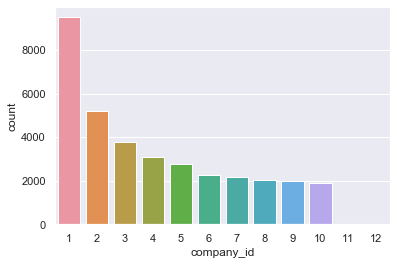

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'company_id', data = ER)

[Text(0, 0, 'temp_contractor'),
 Text(0, 0, 'design'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'customer_service'),
 Text(0, 0, 'data_science'),
 Text(0, 0, 'sales')]

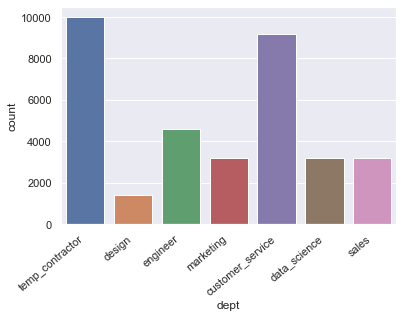

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'dept', data = ER)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

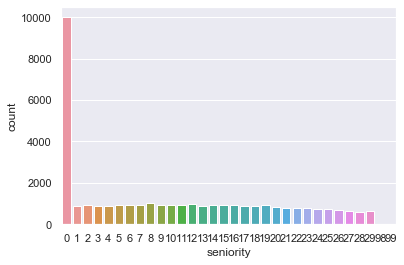

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'seniority', data = ER)

In [11]:
ER.drop( ER[ ER['dept']== 'temp_contractor' ].index , inplace=True)

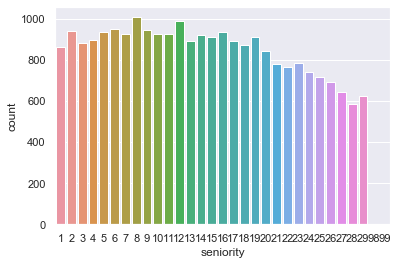

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'seniority', data = ER)

# remove temp contractors

These employees do not contribute to our understanding of retention as they a hired with an expiration date. 

Text(0.5, 0, 'Seniority')

Text(0, 0.5, 'Salary')

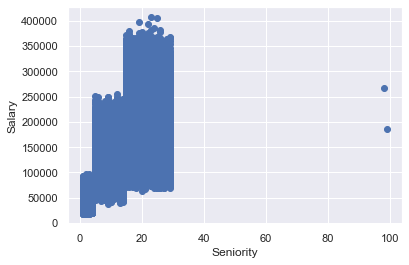

In [17]:
#is salary corrolated with experience 
plt.scatter(ER.seniority, ER.salary)
plt.xlabel('Seniority')
plt.ylabel('Salary')
plt.show()

Text(0.5, 0, 'Experience')

Text(0, 0.5, 'Salary')

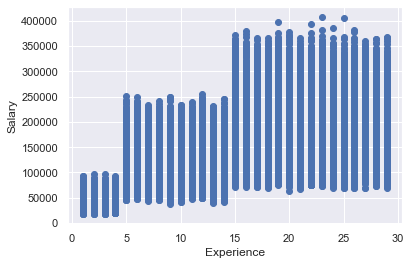

In [19]:
ER.drop( ER[ ER['seniority'] > 30 ].index , inplace=True)
plt.scatter(ER.seniority, ER.salary)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# remove outliers

For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit

In [25]:
print("Missing Salary Information:",ER['salary'].isnull().sum())

Missing Salary Information: 239


In [ ]:
modER = ER.dropna(how='any', subset=['salary'])

# remove missing salary data

In [28]:
print("Total hired:",modER['join_date'].notnull().sum())
print("Still working at job:",modER['quit_date'].isnull().sum())
print("Left Job:",(modER['join_date'].notnull().sum())-modER['quit_date'].isnull().sum())

Total hired: 24461
Still working at job: 11084
Left Job: 13377


# As of 2015/12/13, how many employees have quit?

After removing outliers, temp workers and employees with missing salary data, a total of 13,377 out of 24,461 employees or 55% of employees hired between January 24th, 2011 and December 13th, 2015 quit.  

In [29]:
modER['join_date'] = pd.to_datetime(modER['join_date'])
modER['quit_date'] = pd.to_datetime(modER['quit_date'])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
modER['diff'] = (modER['quit_date']-modER['join_date'])/timedelta(days=1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
constant = datetime(year=2015,month=12,day=13)
constant

datetime.datetime(2015, 12, 13, 0, 0)

In [34]:
modER['diff_NQD'] = (constant-modER['join_date'])/timedelta(days=1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
modER.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,diff,diff_NQD
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304.0,1671.0
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110.0,1357.0
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662.0,979.0
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT,NaN,531.0
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634.0,1259.0


In [227]:
#sns.set(style="darkgrid")
#ax = sns.countplot(x = 'diff', data = modER)

Text(0, 0.5, '# of employees who quit')

Text(0.5, 0, 'time in the job')

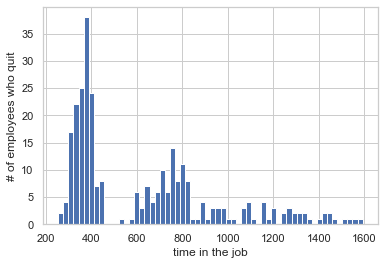

In [228]:
modER.loc[modER['employee_id'],'diff'].hist(bins=60)
plt.ylabel('# of employees who quit')
plt.xlabel('time in the job')

# Is there a difference between those who left within the first 500 days versus those who stayed for longer than 500 days?

In [214]:
samp_quit = modER[modER['diff']<=500]
samp_quit['churn'] = 0

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [215]:
samp_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7268 entries, 1 to 34695
Data columns (total 10 columns):
employee_id    7268 non-null float64
company_id     7268 non-null int64
dept           7268 non-null object
seniority      7268 non-null int64
salary         7268 non-null float64
join_date      7268 non-null datetime64[ns]
quit_date      7268 non-null datetime64[ns]
diff           7268 non-null float64
diff_NQD       7268 non-null float64
churn          7268 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 624.6+ KB


In [216]:
#modER[modER['quit_date']==NaT]
samp = modER[modER['quit_date'].isnull()] 
samp_stay = samp[samp['diff_NQD']>=500]
samp_stay['churn'] = 1
samp_stay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 5 to 34691
Data columns (total 10 columns):
employee_id    4994 non-null float64
company_id     4994 non-null int64
dept           4994 non-null object
seniority      4994 non-null int64
salary         4994 non-null float64
join_date      4994 non-null datetime64[ns]
quit_date      0 non-null datetime64[ns]
diff           0 non-null float64
diff_NQD       4994 non-null float64
churn          4994 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 429.2+ KB


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [217]:
sample = samp_quit.append(samp_stay)

In [234]:
sample['seniority_group'] = pd.cut(sample.seniority,bins = [1,7,14,21,29],labels = ['beginner','intermediate','expert','master'])
sample['salary_group'] = pd.cut(sample.salary,bins = [17000,78000,123000,187000,408000],labels = ['low','med','high','really_high'])
sample.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,diff,diff_NQD,churn,seniority_group,salary_group
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304.0,1671.0,0,expert,really_high
11,838072.0,3,data_science,13,162000.0,2011-10-03,2012-08-10,312.0,1532.0,0,intermediate,high
12,205557.0,8,customer_service,17,109000.0,2013-07-22,2014-07-18,361.0,874.0,0,expert,med
23,182278.0,1,sales,19,179000.0,2011-09-19,2012-11-02,410.0,1546.0,0,expert,high
28,28269.0,2,sales,9,153000.0,2011-08-29,2012-08-03,340.0,1567.0,0,intermediate,high


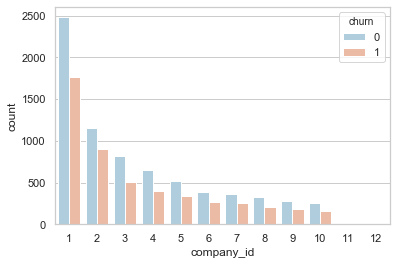

In [235]:
sns.set_style('whitegrid')
sns.countplot(x='company_id',hue='churn',data=sample,palette='RdBu_r')

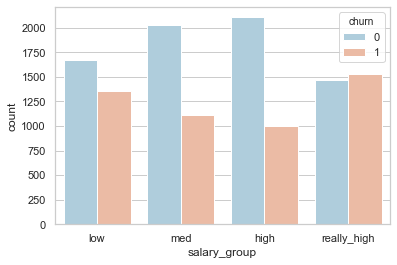

In [236]:
sns.set_style('whitegrid')
sns.countplot(x='salary_group',hue='churn',data=sample,palette='RdBu_r')

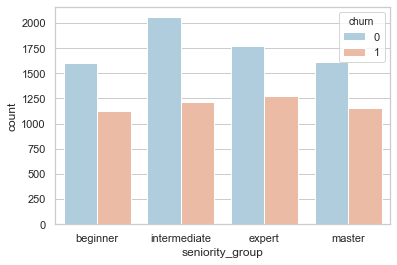

In [237]:
sns.set_style('whitegrid')
sns.countplot(x='seniority_group',hue='churn',data=sample,palette='RdBu_r')

[Text(0, 0, 'design'),
 Text(0, 0, 'data_science'),
 Text(0, 0, 'customer_service'),
 Text(0, 0, 'sales'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'engineer')]

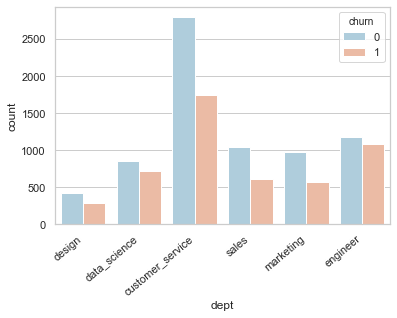

In [239]:
sns.set_style('whitegrid')
ax = sns.countplot(x='dept',hue='churn',data=sample,palette='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [240]:
depts = pd.get_dummies(sample['dept'])
sample = pd.concat([sample,depts],axis=1)
company_ids = pd.get_dummies(sample['company_id'])
sample = pd.concat([sample,company_ids],axis=1)
seniority_groups = pd.get_dummies(sample['seniority_group'])
sample = pd.concat([sample,seniority_groups],axis=1)
salary_groups = pd.get_dummies(sample['salary_group'])
sample = pd.concat([sample,salary_groups],axis=1)

In [241]:
sample.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,diff,diff_NQD,churn,...,11,12,beginner,intermediate,expert,master,low,med,high,really_high
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304.0,1671.0,0,...,0,0,0,0,1,0,0,0,0,1
11,838072.0,3,data_science,13,162000.0,2011-10-03,2012-08-10,312.0,1532.0,0,...,0,0,0,1,0,0,0,0,1,0
12,205557.0,8,customer_service,17,109000.0,2013-07-22,2014-07-18,361.0,874.0,0,...,0,0,0,0,1,0,0,1,0,0
23,182278.0,1,sales,19,179000.0,2011-09-19,2012-11-02,410.0,1546.0,0,...,0,0,0,0,1,0,0,0,1,0
28,28269.0,2,sales,9,153000.0,2011-08-29,2012-08-03,340.0,1567.0,0,...,0,0,0,1,0,0,0,0,1,0


In [346]:
#1,sales,low,beginner 
from sklearn.model_selection import train_test_split
X = sample[['low','really_high','high','med','beginner','master','expert','intermediate','customer_service','data_science','design','engineer','marketing','sales']]
y = sample['churn']

In [347]:
# Resampling the minority class of conversion (i.e., first run through led to difficulties with convergence and funky outputs). 
from imblearn.over_sampling import RandomOverSampler # Using naive random sampler as it seemed the simplest and I was most comfortable with the process
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=101)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.5668
Precision: 0.5625
Recall: 0.5809
ROC_AUC:, 0.5669
F1: 0.5716


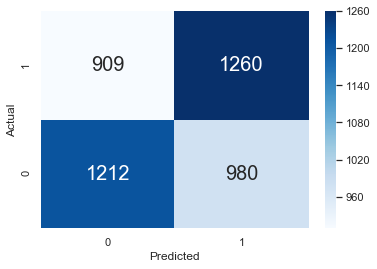

In [349]:
classifier = RandomForestClassifier(n_estimators=14, max_depth=100)
classifier.fit(X_train, y_train)
pred_train= classifier.predict(X_train)
pred_test= classifier.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test)
f1_val = f1_score(y_test, pred_test)
bin_metrics(y_test, pred_test)
plot_cm(y_test, pred_test)

In [350]:
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(14))

                  importance
high                0.171829
really_high         0.122787
engineer            0.094593
low                 0.086070
intermediate        0.078640
med                 0.072825
expert              0.070583
beginner            0.065435
customer_service    0.044960
master              0.044923
data_science        0.043774
marketing           0.042974
sales               0.034495
design              0.026111


# End of Data Challenge

In [ ]:
#model = ols('churn ~ C(dept)*C(seniority)*C(salary)*C(company_id)',modER_sub).fit()

#print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

In [306]:
model = ols('churn ~ C(company_id)',sample).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 11, 12250) =  1.883, p =  0.0365


In [307]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.883
Date:                Thu, 20 Feb 2020   Prob (F-statistic):             0.0365
Time:                        12:43:00   Log-Likelihood:                -8674.7
No. Observations:               12262   AIC:                         1.737e+04
Df Residuals:                   12250   BIC:                         1.746e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4155      0.008     55.106      0.000       0.401       0.430
C(company_id)[T.2]      0.0231      0.013      1.748      0.080      -0.003       0.049
C(company_id)[T.3]     -0.0351      0.015     -2.273      0.023      -0.065      -0.005
C(company_id)[T.4]     -0.0360      0.017     -2.130      0.033      -0.069      -0.003
C(company_id)[T.5]     -0.0220      0.018     -1.200      0.230      -0.058       0.014
C(company_id)[T.6]     -0.0106      0.021     -0.513      0.608      -0.051       0.030
C(company_id)[T.7]     -0.0030      0.021     -0.142      0.887      -0.044       0.038
C(company_id)[T.8]     -0.0316      0.023     -1.402      0.161      -0.076       0.013
C(company_id)[T.9]     -0.0159      0.024     -0.663      0.507      -0.063       0.031
C(company_id)[T.10]    -0.0282      0.025     -1.129      0.259      -0.077       0.021
C(company_id)[T.11]    -0.1155      0.155     -0.743      0.458      -0.420       0.189
C(company_id)[T.12]     0.0845      0.123      0.687      0.492      -0.157       0.326
==============================================================================
Omnibus:                    46618.883   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2040.684
Skew:                           0.376   Prob(JB):                         0.00
Kurtosis:                       1.149   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
model = ols('churn ~ C(salary_group)',sample).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 12256) =  96.390, p =  0.0000


In [309]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     96.39
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.16e-61
Time:                        12:43:08   Log-Likelihood:                -8540.6
No. Observations:               12260   AIC:                         1.709e+04
Df Residuals:                   12256   BIC:                         1.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.4482      0.009     50.739      0.000       0.431       0.466
C(salary_group)[T.med]            -0.0949      0.012     -7.667      0.000      -0.119      -0.071
C(salary_group)[T.high]           -0.1255      0.012    -10.118      0.000      -0.150      -0.101
C(salary_group)[T.really_high]     0.0621      0.013      4.960      0.000       0.038       0.087
==============================================================================
Omnibus:                    49857.001   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1871.418
Skew:                           0.366   Prob(JB):                         0.00
Kurtosis:                       1.231   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
model = ols('churn ~ C(dept)',sample).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 5, 12256) =  19.685, p =  0.0000


In [311]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     19.69
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.36e-19
Time:                        12:43:14   Log-Likelihood:                -8636.0
No. Observations:               12262   AIC:                         1.728e+04
Df Residuals:                   12256   BIC:                         1.733e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.3837      0.007     52.805      0.000       0.369       0.398
C(dept)[T.data_science]     0.0717      0.014      5.008      0.000       0.044       0.100
C(dept)[T.design]           0.0168      0.020      0.849      0.396      -0.022       0.056
C(dept)[T.engineer]         0.0968      0.013      7.677      0.000       0.072       0.121
C(dept)[T.marketing]       -0.0154      0.014     -1.066      0.286      -0.044       0.013
C(dept)[T.sales]           -0.0187      0.014     -1.326      0.185      -0.046       0.009
==============================================================================
Omnibus:                    47502.335   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1990.549
Skew:                           0.374   Prob(JB):                         0.00
Kurtosis:                       1.173   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
model = ols('churn ~ C(seniority_group)',sample).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 11817) =  6.601, p =  0.0002


In [313]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.601
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           0.000188
Time:                        12:43:19   Log-Likelihood:                -8349.0
No. Observations:               11821   AIC:                         1.671e+04
Df Residuals:                   11817   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.4139      0.009     44.099      0.000       0.396       0.432
C(seniority_group)[T.intermediate]    -0.0419      0.013     -3.300      0.001      -0.067      -0.017
C(seniority_group)[T.expert]           0.0049      0.013      0.377      0.706      -0.020       0.030
C(seniority_group)[T.master]           0.0031      0.013      0.235      0.814      -0.023       0.029
==============================================================================
Omnibus:                    45294.707   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1968.906
Skew:                           0.389   Prob(JB):                         0.00
Kurtosis:                       1.158   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The variables that seen to drive employee churn are department, salary and years of experience. 

1) employees who are hired with 7-14 years of experience are more likely to leave after a year 

2) employees in data science and the enginearing department are more likely to stay past the one year mark 

3) employees who make the most and least amount of money are more likely to stay longer than a year
 
## Reasons for these trends:

1) Employees who have the least and most experience are more likely to stay. Employees with less experience may not have the qualifications to find "better" job. Employees with more experience are more likely to stay as they are in a more mature state in there carree.

2) The departments where people are more likely to stay also pay more compared to other departments. This could be a reason for longer retention.

3) Employees who make more money have more insentive to stay while those who make slightly less may be able to find higher salaries at different companies. 

In [252]:
sample.describe()

,employee_id,company_id,seniority,salary,diff,diff_NQD,churn,customer_service,data_science,design,...,11,12,beginner,intermediate,expert,master,low,med,high,really_high
count,12262.000000,12262.000000,12262.000000,12262.000000,7268.000000,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000,...,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000,12262.000000
mean,499914.569401,3.435981,14.136601,137454.493557,363.238580,1000.215544,0.407275,0.370005,0.128201,0.057413,...,0.000816,0.001305,0.222639,0.267248,0.249062,0.225086,0.246534,0.255749,0.253711,0.243843
std,288904.668736,2.707309,8.073778,74744.895840,41.253068,376.134986,0.491347,0.482825,0.334327,0.232640,...,0.028547,0.036101,0.416035,0.442541,0.432488,0.417656,0.431011,0.436299,0.435152,0.429416
min,70.000000,1.000000,1.000000,17000.000000,102.000000,285.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247826.500000,1.000000,7.000000,79000.000000,339.000000,678.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499832.500000,2.000000,14.000000,123000.000000,364.000000,951.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,752136.250000,5.000000,21.000000,185000.000000,389.000000,1301.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,999969.000000,12.000000,29.000000,408000.000000,500.000000,1784.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
#1,sales,low,beginner 
from sklearn.model_selection import train_test_split
X = sample[['really_high','high','med','master','expert','intermediate','customer_service','data_science','design','engineer','marketing']]
y = sample['churn']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [269]:
from sklearn.linear_model import LogisticRegression

In [270]:
logmodel = LogisticRegression()

In [271]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
predictions = logmodel.predict(X_test)

In [273]:
logmodel.score(X_test,y_test)

0.6148409893992933

In [274]:
from sklearn.metrics import classification_report
target_names = ['quit','stayed']

In [275]:
print(classification_report(y_test,predictions,target_names=target_names))

              precision    recall  f1-score   support

        quit       0.62      0.86      0.72      2153
      stayed       0.58      0.26      0.36      1526

    accuracy                           0.61      3679
   macro avg       0.60      0.56      0.54      3679
weighted avg       0.60      0.61      0.57      3679



In [276]:
from sklearn.metrics import confusion_matrix

In [277]:
confusion_matrix(y_test,predictions)

array([[1860,  293],
       [1124,  402]])

In [298]:
logit = sm.Logit(y_test, X_test)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.664015
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3679
Model:                          Logit   Df Residuals:                     3668
Method:                           MLE   Df Model:                           10
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                 0.02143
Time:                        12:37:09   Log-Likelihood:                -2442.9
converged:                       True   LL-Null:                       -2496.4
Covariance Type:            nonrobust   LLR p-value:                 2.172e-18
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
really_high         -0.3090      0.172     -1.797      0.072      -0.646       0.028
high       

# I want to compare a list of people who quit in there first year versus a list of people who stayed after their first year

I am kind of interested in comparing those that left after 1 year vs. those that stayed. 

run an anova between a group that left and a group that stayed for company_id, dept, seniority, salary. follow up which groups are responsable for significance. 

now if I put all these things into a model do I get a good predicton of who is leaving and who is staying? 

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
dtree = DecisionTreeClassifier()

In [280]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [281]:
predictions = dtree.predict(X_test)

In [282]:
from sklearn.metrics import classification_report,confusion_matrix

In [283]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73      2153
           1       0.60      0.23      0.34      1526

    accuracy                           0.62      3679
   macro avg       0.61      0.56      0.53      3679
weighted avg       0.61      0.62      0.57      3679



In [284]:
print(confusion_matrix(y_test,predictions))

[[1910  243]
 [1168  358]]


In [285]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [286]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [287]:
predictions = rfc.predict(X_test)

In [288]:
from sklearn.metrics import classification_report,confusion_matrix

In [289]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73      2153
           1       0.58      0.25      0.35      1526

    accuracy                           0.61      3679
   macro avg       0.60      0.56      0.54      3679
weighted avg       0.61      0.61      0.57      3679



In [290]:
print(confusion_matrix(y_test,predictions))

[[1873  280]
 [1137  389]]


In [291]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [292]:
# Some functions we'll use. 
def bin_metrics(x, y):
    '''Prints four common metrics for evaluating classification predictions.'''
    print('Accuracy:', round(metrics.accuracy_score(x, y), 4))
    print('Precision:', round(metrics.precision_score(x, y), 4))
    print('Recall:', round(metrics.recall_score(x, y), 4))
    print('ROC_AUC:,', round(metrics.roc_auc_score(x, y), 4))
    print('F1:', round(metrics.f1_score(x, y), 4))

def plot_cm(x, y):
    cm = confusion_matrix(x, y)
    df_cm = pd.DataFrame(cm, columns=np.unique(x), index = np.unique(x))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')# font size
    plt.ylim([0, 2])

random forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.6138
Precision: 0.5764
Recall: 0.2595
ROC_AUC:, 0.5622
F1: 0.3579


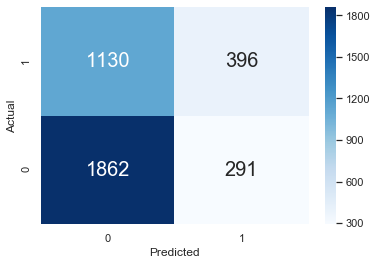

In [293]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.20, random_state = 333)
classifier = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier.fit(X_train, y_train)
pred_train= classifier.predict(X_train)
pred_test= classifier.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test)
f1_val = f1_score(y_test, pred_test)
bin_metrics(y_test, pred_test)
plot_cm(y_test, pred_test)

logistic regressin

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.5746
Precision: 0.5701
Recall: 0.5888
ROC_AUC:, 0.5747
F1: 0.5793


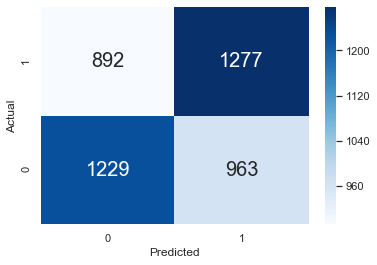

In [333]:
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.20, random_state=333)
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
bin_metrics(y_test, y_pred)
plot_cm(y_test, y_pred)

randome forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Max Accuracy: 0.5751
Max F1: 0.5795


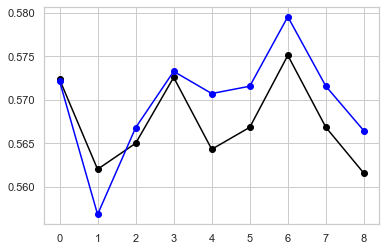

In [334]:
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.20, random_state = 333)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 500]
depth_range = [2, 10, 100]
for i in nEst_range:
    for k in depth_range:
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 4))
print('Max F1:', round(max(f1_scores), 4))

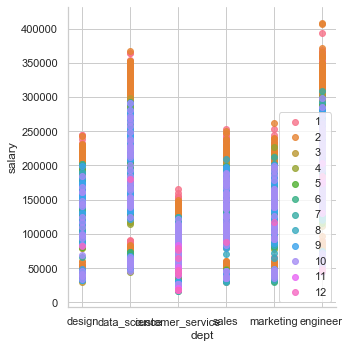

In [296]:
sns.lmplot( x="dept", y="salary", data=sample, fit_reg=False, hue='company_id', legend=False)
plt.legend(loc='lower right')

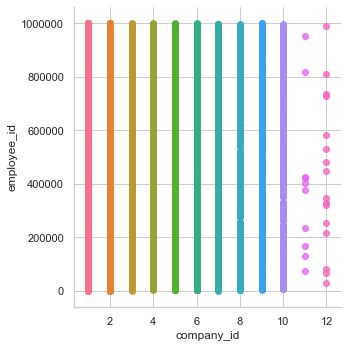

In [297]:
sns.lmplot( x="company_id", y="employee_id", data=sample, fit_reg=False, hue='company_id', legend=False)
#plt.legend(loc='lower right')